In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, wilcoxon

In [2]:
df = pd.read_csv('house_price_Dống-Da_Hà-Nội_subdata.csv')

In [3]:
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [5]:
df.dropna(subset=['area'], inplace=True)
df = df[(df['area'] > 0) & (df['price'] > 0)]
df['price/m2'] = df['price'] / df['area']

<h2> Vẽ biểu đồ so sánh phân phối giá (triệu đ/m2) giữa nhà Phố và Nhà ngõ

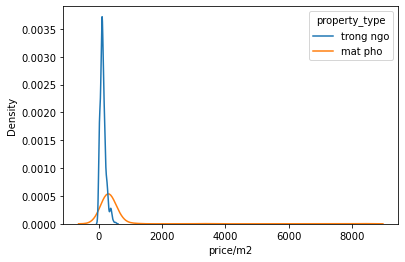

In [6]:
sns.kdeplot(x = 'price/m2', hue = 'property_type', data = df)
plt.rcParams['figure.figsize'] = (10,5)

<h2> Kiểm định giả thuyết giá (triệu đ/m2) nhà mặt phố cao hơn giá nhà trong ngõ với mức ý nghĩa 5%

Giả thuyết:
- $h_0$ :  $μ_Phố$ = $μ_Hẻm$
- $h_0$ :  $μ_Phố$ > $μ_Hẻm$

In [9]:
data1 = df.loc[df['property_type'] == 'trong ngo', 'price/m2']
data2 = df.loc[df['property_type'] == 'mat pho', 'price/m2']
statistic, pvalue = ttest_ind(data2.values,data1.values,equal_var = False, alternative ='greater')

In [10]:
statistic, pvalue

(5.61717186315343, 3.017325736116157e-08)